# Parsing log-file in Python

Learn prasing a log file or any type of text file in order to extract specifie info. Pythn is wonderful for this kind of use and does not require anry third party modeuls. 

In this small project is open the log file and read each line and look for specific text in that line using regex with Sfb IOS log file.

## Open the log file for match in line

In [1]:
# import re for regular expression
import re
 
log_file_path = r"sfbios.log"

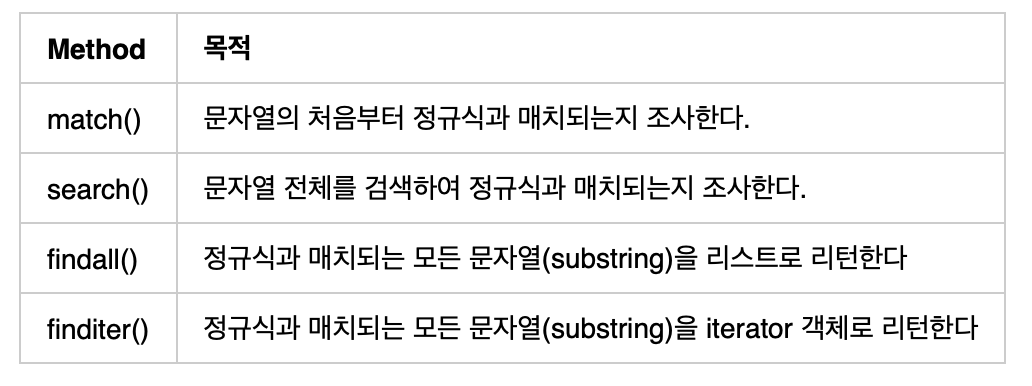

In [2]:
from IPython.display import Image

Image(filename='re.png', width='500')

Play around with different expressions in  https://regexr.com

In [3]:
#  Look for specific properties.<property name="saveMessagingHistory">Disabled</property>

regex = '(<property name="saveMessagingHistory">(.*?)<\/property>)'

# Define list in order to use in script
match_list = []

with open(log_file_path, "r") as file:
    for i in file:
        
         #  Below for statement is looking for text which matches regex in each line
        #  then the corresponding text is assigned to match var as obj.
        for match in re.finditer(regex, i, re.S):
            print(match)
            
            # match.group() will group all regex groups
            # I can change match.group() to match.group(2) to print the 2nd regex group.
            # groups in regex are organized using (). then can extract specific var of the text
            match_text = match.group() 
            match_list.append(match_text)

print('Length: ', len(match_list))
print('Type: ',  type(match_list))
print(match_list[0])

<re.Match object; span=(978, 1034), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(1263, 1319), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(978, 1034), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(3970, 4026), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(1030, 1086), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(3970, 4026), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(1030, 1086), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(1315, 1371), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(1081, 1137), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(3788, 3844), match='<property name="saveMessagingHistory">Enabled</pr>
<re.Match object; span=(1030, 1086), match='<propert

re.finditer() returns an iterator yielding MatchObject instances over all non-overlapping matches for the re pattern in the string. 

* Signature: re.finditer(pattern, string, flags=0)

* Return an iterator over all non-overlapping matches in the string.  For each match, the iterator returns a Match object.

## Parse whole file's data

In [4]:
log_file_path2 = r"sfbios.log"
regex = '(<property name="saveMessagingHistory">(.*?)<\/property>)'

# true is going to parse by line, false is reading the whole file.
switch = False

with open(log_file_path2, "r") as file:
    match_list = []
    
    if switch == True:
        # parse by line
        for i in file:
            for match in re.finditer(regex, i, re.S):
                match_text = match.group()
                match_list.append(match_text)
    else:
        #  data is file's data variable
        data = file.read()
        for i in re.finditer(regex, data, re.S):
            match_text = i.group()
            match_list.append(match_text)

print(len(match_list))
print(match_list)
        
file.close()

12
['<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>', '<property name="saveMessagingHistory">Enabled</property>']


In [5]:
for i in range(len(list(set(match_list)))):
    print(i)

0


## Exporting parsed data to txt

In [6]:
# time_now will be the output file name so we don't need to manage in one folder
import time
from time import strftime

# Define export path
export_file_path = r"parsed_data"

regex = '(<property name="(.*?)">(.*?)<\/property>)'

time_now = str(strftime("%Y-%m-%d %H-%M-%S", time.localtime()))
file = "\\" + "Parser_output_" + time_now + ".txt"
export_file = export_file_path + file

print(export_file)

with open(export_file, "w+") as exfile:
    exfile.write("Exported Data:\n")
    
    # If theare are some duplicates in parsed text, then use list(set(match_list)) to avoid same lines of text
    for i in range(0, len(match_list)):
        exfile.write(match_list[i] + "\n")
        
exfile.close()

parsed_data\Parser_output_2019-06-07 17-33-37.txt


In [7]:
%ls

Log file parsing in Python.ipynb
parsed_data\Parser_output_2019-06-07 15-33-32.txt
parsed_data\Parser_output_2019-06-07 17-33-37.txt
re.png
sfbios.log


In [8]:
# Read exported txt file
read = open("parsed_data\Parser_output_2019-06-07 15-33-32.txt", "r")

while True:
    line = read.readline()
    if not line:
        break
    print(line)
    
read.close()

Exported Data:

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>

<property name="saveMessagingHistory">Enabled</property>



## Buliding the funcion for Parsing process

In [25]:
def main():
    log_file_path = r"sfbios.log"
    export_file_path = r"export_log_file"
    
    time_now = str(strftime("%Y-%m-%d %H-%M-%S", time.localtime()))
    
    file = "\\" + time_now + ".txt"
    export_file = export_file_path + file
    regex = regex = '(<property name="(.*?)">(.*?)<\/property>)'
    
    parsingLog(log_file_path, export_file, regex, switch=False)
    

# Define parsingLog function
def parsingLog(log_file_path, export_file, regex, switch):
    # read txt file
    with open(log_file_path, "r") as file:
        match_list = []
        
        # read line by line
        if switch == True:
            for i in file:
                for match in re.finditer(regex, i, re.S):
                    match_text = match.group()
                    match_list.append(match_text)
        else:
            # read whole data
            data = file.read()
            for match in re.finditer(regex, data, re.S):
                match_text = match.group()
                match_list.append(match_text)
    
    file.close()
    
    with open(export_file, "w+") as file:
        file.write("Exported data:\n")
        match_list_clean = list(set(match_list))
        
        for i in range(0, len(match_list_clean)):
            file.write(match_list_clean[i] + "\n")
            
    file.close()
                                      
        

if __name__ == '__main__':
    main()